In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
pd.set_option('display.max_columns',None)
from tqdm import tqdm

In [2]:
data = pd.read_csv('F:/公共交通/组合/1217/1217with街道数据.csv',low_memory=False)

In [3]:
data

,card_no,enstation_time,enstation_name,orientation,line_name,lon1,lat1,exstation_name,lon2,lat2,enstation_district,enstation_street,exstation_district,exstation_street
0,1.000000e+15,2022-11-03 18:12:15,新鸿路,2.0,71,104.10720,30.661700,小龙桥路,104.110880,30.659771,成华区,双桥子街道,成华区,双桥子街道
1,1.000000e+15,2022-11-03 07:13:01,文家大道南,1.0,232,103.94210,30.693420,文家大道成温路口,103.940245,30.689269,青羊区,黄田坝街道,青羊区,蔡桥街道
2,1.000000e+15,2022-11-03 08:02:53,凯德风尚,1.0,309,103.95750,30.668860,光华大道一段东二站,103.952034,30.668457,青羊区,蔡桥街道,青羊区,蔡桥街道
3,1.000000e+15,2022-11-03 17:49:07,繁清家具厂,2.0,316,104.03617,30.796137,新泉路口,104.042276,30.715166,新都区,大丰街道,金牛区,九里堤街道
4,1.000000e+15,2022-11-03 17:43:10,西御街,1.0,13,104.06270,30.656330,清波社区,103.986536,30.681534,青羊区,西御河街道,青羊区,苏坡街道
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8566140,3.105170e+18,2022-11-15 09:03:56,安靖快铁公交站,1.0,143,104.03520,30.736160,地铁金华寺东路站,104.124843,30.769408,金牛区,沙河源街道,新都区,三河街道
8566141,3.105170e+18,2022-11-15 18:11:43,民兴北一路,2.0,14,104.15810,30.683370,华泰路北,104.166534,30.696355,成华区,龙潭街道,成华区,龙潭街道
8566142,3.105170e+18,2022-11-15 08:16:45,红牌楼,1.0,45,104.03220,30.636030,国学巷,104.062633,30.643799,武侯区,浆洗街街道,武侯区,玉林街道
8566143,3.105170e+18,2022-11-15 08:38:28,高攀路口,2.0,121,104.08260,30.607750,府城大道一医院,104.054012,30.588427,武侯区,桂溪街道,武侯区,石羊街道


In [ ]:
data = data.dropna(subset=['enstation_street','exstation_street']).reset_index(drop=True)

In [4]:
POI = pd.read_csv('POI_count_all.csv',encoding='gbk')

In [5]:
POI.drop_duplicates(inplace=True)

In [6]:
data[[POI['type'].unique()]] = 0

In [7]:
data

,card_no,enstation_time,enstation_name,orientation,line_name,lon1,lat1,exstation_name,lon2,lat2,enstation_district,enstation_street,exstation_district,exstation_street,餐饮服务,道路附属设施,风景名胜,公司企业,购物服务,交通设施服务,金融保险服务,科教文化服务,摩托车服务,汽车服务,汽车维修,汽车销售,商务住宅,生活服务,体育休闲服务,医疗保健服务,住宿服务,政府机构及社会团体,公共设施,通行设施
0,1.000000e+15,2022-11-03 18:12:15,新鸿路,2.0,71,104.10720,30.661700,小龙桥路,104.110880,30.659771,成华区,双桥子街道,成华区,双桥子街道,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.000000e+15,2022-11-03 07:13:01,文家大道南,1.0,232,103.94210,30.693420,文家大道成温路口,103.940245,30.689269,青羊区,黄田坝街道,青羊区,蔡桥街道,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.000000e+15,2022-11-03 08:02:53,凯德风尚,1.0,309,103.95750,30.668860,光华大道一段东二站,103.952034,30.668457,青羊区,蔡桥街道,青羊区,蔡桥街道,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.000000e+15,2022-11-03 17:49:07,繁清家具厂,2.0,316,104.03617,30.796137,新泉路口,104.042276,30.715166,新都区,大丰街道,金牛区,九里堤街道,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.000000e+15,2022-11-03 17:43:10,西御街,1.0,13,104.06270,30.656330,清波社区,103.986536,30.681534,青羊区,西御河街道,青羊区,苏坡街道,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8566140,3.105170e+18,2022-11-15 09:03:56,安靖快铁公交站,1.0,143,104.03520,30.736160,地铁金华寺东路站,104.124843,30.769408,金牛区,沙河源街道,新都区,三河街道,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8566141,3.105170e+18,2022-11-15 18:11:43,民兴北一路,2.0,14,104.15810,30.683370,华泰路北,104.166534,30.696355,成华区,龙潭街道,成华区,龙潭街道,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8566142,3.105170e+18,2022-11-15 08:16:45,红牌楼,1.0,45,104.03220,30.636030,国学巷,104.062633,30.643799,武侯区,浆洗街街道,武侯区,玉林街道,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8566143,3.105170e+18,2022-11-15 08:38:28,高攀路口,2.0,121,104.08260,30.607750,府城大道一医院,104.054012,30.588427,武侯区,桂溪街道,武侯区,石羊街道,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
col = np.append('street',POI['type'].unique())

In [9]:
col

array(['street', '餐饮服务', '道路附属设施', '风景名胜', '公司企业', '购物服务', '交通设施服务',
       '金融保险服务', '科教文化服务', '摩托车服务', '汽车服务', '汽车维修', '汽车销售', '商务住宅',
       '生活服务', '体育休闲服务', '医疗保健服务', '住宿服务', '政府机构及社会团体', '公共设施', '通行设施'],
      dtype=object)

In [10]:
POI_test = pd.DataFrame(columns=col)

In [11]:
POI

,type,streets,region,amount
0,餐饮服务,沙河街道,锦江区,418
1,道路附属设施,沙河街道,锦江区,0
2,风景名胜,沙河街道,锦江区,7
3,公司企业,沙河街道,锦江区,205
4,购物服务,沙河街道,锦江区,674
...,...,...,...,...
2535,医疗保健服务,宝墩镇,新津区,8
2536,住宿服务,宝墩镇,新津区,1
2537,政府机构及社会团体,宝墩镇,新津区,35
2539,公共设施,宝墩镇,新津区,0


In [12]:
POI['streets'].unique()

array(['沙河街道', '柳江街道', '三圣街道', '春熙路街道', '书院街街道', '?牛市口街道', '狮子山街道',
       '成龙路街道', '锦官驿街道', '东湖街道', '锦华路街道', '少城街道', '府南街道', '草堂街道', '光华街道',
       '金沙街道', '苏坡街道', '文家街道', '草市街街道', '西御河街道', '黄田坝街道', '蔡桥街道', '康河街道',
       '抚琴街道', '西华街道', '金泉街道', '茶店子街道', '营门口街道', '九里堤街道', '五块石街道',
       '荷花池街道', '驷马桥街道', '西安路街道', '天回镇街道', '沙河源街道', '凤凰山街道', '玉林街道',
       '晋阳街道', '簇桥街道', '簇锦街道', '华兴街道', '望江路街道', '浆洗街街道', '红牌楼街道', '机投桥街道',
       '金花桥街道', '火车南站街道', '芳草街街道', '石羊街道', '桂溪街道', '肖家河街道', '保和街道',
       '青龙街道', '龙潭街道', '猛追湾街道', '双桥子街道', '白莲池街道', '府青路街道', '跳蹬河街道',
       '万年场街道', '二仙桥街道', '双水碾街道', '龙泉街道', '大面街道', '十陵街道', '同安街道', '东安街道',
       '西河街道', '柏合街道', '大弯街道', '大同街道', '大丰街道', '三河街道', '新都街道', '桂湖街道',
       '新繁街道', '石板滩街道', '斑竹园街道', '柳城街道', '天府街道', '涌泉街道', '公平街道', '金马街道',
       '永宁街道', '郫筒街道', '合作街道', '西园街道', '安德街道', '红光街道', '犀浦街道', '德源街道',
       '安靖街道', '团结街道', '五津街道', '普兴街道', '花桥街道', '花源街道', '洛带镇', '洪安镇',
       '山泉镇', '弥牟镇', '城厢镇', '清泉镇', '姚渡镇', '福洪镇', '清流镇', '军屯镇', '万春镇',
       '寿

In [13]:
i = 0
for street in POI['streets'].unique():
    data_POI = POI[POI['streets'] == street]['amount']
    data_POI = np.append(street,data_POI)
    POI_test.loc[i] = data_POI
    i += 1 

In [14]:
POI_test = POI_test.set_index('street')

In [15]:
POI_test.reset_index(inplace=True)

In [25]:
POI_test.loc[5,'street'] = '牛市口街道'

In [27]:
POI_test

,street,餐饮服务,道路附属设施,风景名胜,公司企业,购物服务,交通设施服务,金融保险服务,科教文化服务,摩托车服务,汽车服务,汽车维修,汽车销售,商务住宅,生活服务,体育休闲服务,医疗保健服务,住宿服务,政府机构及社会团体,公共设施,通行设施
0,沙河街道,418,0,7,205,674,95,13,54,3,24,14,3,52,453,47,104,62,113,6,0
1,柳江街道,270,0,1,117,315,143,9,36,5,54,23,7,50,355,49,80,21,78,6,0
2,三圣街道,353,0,8,43,197,41,7,23,1,12,2,2,36,258,46,34,353,80,2,0
3,春熙路街道,887,0,22,111,866,149,28,61,2,34,3,2,81,851,222,65,888,59,31,0
4,书院街街道,348,0,17,74,490,153,15,883,3,19,5,1,75,365,65,109,61,150,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,三道堰镇,331,2,32,117,343,99,5,31,2,21,8,74,44,218,90,55,101,89,17,0
117,安西镇,324,2,6,115,641,99,18,33,5,53,17,9,53,305,35,115,25,73,6,0
118,兴义镇,48,0,2,18,73,6,4,18,1,2,4,0,5,36,20,24,13,50,3,0
119,永商镇,72,0,10,24,75,6,4,16,1,15,7,3,9,45,49,16,14,82,1,0


In [17]:
POI_test.set_index('street').columns

Index(['餐饮服务', '道路附属设施', '风景名胜', '公司企业', '购物服务', '交通设施服务', '金融保险服务', '科教文化服务',
       '摩托车服务', '汽车服务', '汽车维修', '汽车销售', '商务住宅', '生活服务', '体育休闲服务', '医疗保健服务',
       '住宿服务', '政府机构及社会团体', '公共设施', '通行设施'],
      dtype='object')

In [28]:
for street in tqdm(POI_test['street']):
    print(street)
    for col in POI['type'].unique():
        data.loc[data['enstation_street'] == street, col] = POI_test.set_index('street').loc[street][col]

  0%|                                                                                          | 0/121 [00:00<?, ?it/s]

沙河街道


  1%|▋                                                                                 | 1/121 [00:12<24:22, 12.19s/it]

柳江街道


  2%|█▎                                                                                | 2/121 [00:24<23:53, 12.05s/it]

三圣街道


  2%|██                                                                                | 3/121 [00:36<23:50, 12.12s/it]

春熙路街道


  3%|██▋                                                                               | 4/121 [00:48<23:26, 12.02s/it]

书院街街道


  4%|███▍                                                                              | 5/121 [00:59<23:03, 11.92s/it]

牛市口街道


  5%|████                                                                              | 6/121 [01:11<22:53, 11.94s/it]

狮子山街道


  6%|████▋                                                                             | 7/121 [01:23<22:34, 11.88s/it]

成龙路街道


  7%|█████▍                                                                            | 8/121 [01:36<22:38, 12.02s/it]

锦官驿街道


  7%|██████                                                                            | 9/121 [01:47<22:19, 11.96s/it]

东湖街道


  8%|██████▋                                                                          | 10/121 [02:00<22:21, 12.09s/it]

锦华路街道


  9%|███████▎                                                                         | 11/121 [02:12<22:30, 12.28s/it]

少城街道


 10%|████████                                                                         | 12/121 [02:25<22:13, 12.23s/it]

府南街道


 11%|████████▋                                                                        | 13/121 [02:37<22:00, 12.23s/it]

草堂街道


 12%|█████████▎                                                                       | 14/121 [02:49<21:47, 12.22s/it]

光华街道


 12%|██████████                                                                       | 15/121 [03:01<21:35, 12.23s/it]

金沙街道


 13%|██████████▋                                                                      | 16/121 [03:13<21:17, 12.17s/it]

苏坡街道


 14%|███████████▍                                                                     | 17/121 [03:26<21:08, 12.20s/it]

文家街道


 15%|████████████                                                                     | 18/121 [03:38<20:55, 12.19s/it]

草市街街道


 16%|████████████▋                                                                    | 19/121 [03:50<20:39, 12.15s/it]

西御河街道


 17%|█████████████▍                                                                   | 20/121 [04:02<20:25, 12.14s/it]

黄田坝街道


 17%|██████████████                                                                   | 21/121 [04:14<20:06, 12.06s/it]

蔡桥街道


 18%|██████████████▋                                                                  | 22/121 [04:26<19:55, 12.07s/it]

康河街道


 19%|███████████████▍                                                                 | 23/121 [04:38<19:40, 12.04s/it]

抚琴街道


 20%|████████████████                                                                 | 24/121 [04:50<19:29, 12.06s/it]

西华街道


 21%|████████████████▋                                                                | 25/121 [05:02<19:26, 12.15s/it]

金泉街道


 21%|█████████████████▍                                                               | 26/121 [05:14<19:13, 12.14s/it]

茶店子街道


 22%|██████████████████                                                               | 27/121 [05:26<18:53, 12.06s/it]

营门口街道


 23%|██████████████████▋                                                              | 28/121 [05:38<18:31, 11.95s/it]

九里堤街道


 24%|███████████████████▍                                                             | 29/121 [05:51<18:44, 12.22s/it]

五块石街道


 25%|████████████████████                                                             | 30/121 [06:03<18:24, 12.14s/it]

荷花池街道


 26%|████████████████████▊                                                            | 31/121 [06:15<18:12, 12.14s/it]

驷马桥街道


 26%|█████████████████████▍                                                           | 32/121 [06:27<18:03, 12.17s/it]

西安路街道


 27%|██████████████████████                                                           | 33/121 [06:40<17:59, 12.26s/it]

天回镇街道


 28%|██████████████████████▊                                                          | 34/121 [06:52<17:40, 12.19s/it]

沙河源街道


 29%|███████████████████████▍                                                         | 35/121 [07:04<17:19, 12.09s/it]

凤凰山街道


 30%|████████████████████████                                                         | 36/121 [07:15<16:58, 11.98s/it]

玉林街道


 31%|████████████████████████▊                                                        | 37/121 [07:27<16:50, 12.03s/it]

晋阳街道


 31%|█████████████████████████▍                                                       | 38/121 [07:39<16:35, 11.99s/it]

簇桥街道


 32%|██████████████████████████                                                       | 39/121 [07:51<16:15, 11.90s/it]

簇锦街道


 33%|██████████████████████████▊                                                      | 40/121 [08:03<16:09, 11.97s/it]

华兴街道


 34%|███████████████████████████▍                                                     | 41/121 [08:15<15:59, 11.99s/it]

望江路街道


 35%|████████████████████████████                                                     | 42/121 [08:27<15:42, 11.93s/it]

浆洗街街道


 36%|████████████████████████████▊                                                    | 43/121 [08:39<15:37, 12.01s/it]

红牌楼街道


 36%|█████████████████████████████▍                                                   | 44/121 [08:51<15:25, 12.02s/it]

机投桥街道


 37%|██████████████████████████████                                                   | 45/121 [09:03<15:08, 11.95s/it]

金花桥街道


 38%|██████████████████████████████▊                                                  | 46/121 [09:15<14:47, 11.83s/it]

火车南站街道


 39%|███████████████████████████████▍                                                 | 47/121 [09:25<14:14, 11.55s/it]

芳草街街道


 40%|████████████████████████████████▏                                                | 48/121 [09:37<14:10, 11.65s/it]

石羊街道


 40%|████████████████████████████████▊                                                | 49/121 [09:49<14:07, 11.77s/it]

桂溪街道


 41%|█████████████████████████████████▍                                               | 50/121 [10:02<14:08, 11.95s/it]

肖家河街道


 42%|██████████████████████████████████▏                                              | 51/121 [10:14<13:53, 11.90s/it]

保和街道


 43%|██████████████████████████████████▊                                              | 52/121 [10:26<13:48, 12.00s/it]

青龙街道


 44%|███████████████████████████████████▍                                             | 53/121 [10:38<13:38, 12.04s/it]

龙潭街道


 45%|████████████████████████████████████▏                                            | 54/121 [10:50<13:30, 12.10s/it]

猛追湾街道


 45%|████████████████████████████████████▊                                            | 55/121 [11:02<13:13, 12.02s/it]

双桥子街道


 46%|█████████████████████████████████████▍                                           | 56/121 [11:14<12:59, 11.98s/it]

白莲池街道


 47%|██████████████████████████████████████▏                                          | 57/121 [11:26<12:41, 11.90s/it]

府青路街道


 48%|██████████████████████████████████████▊                                          | 58/121 [11:37<12:30, 11.91s/it]

跳蹬河街道


 49%|███████████████████████████████████████▍                                         | 59/121 [11:49<12:18, 11.92s/it]

万年场街道


 50%|████████████████████████████████████████▏                                        | 60/121 [12:01<11:59, 11.80s/it]

二仙桥街道


 50%|████████████████████████████████████████▊                                        | 61/121 [12:13<11:49, 11.82s/it]

双水碾街道


 51%|█████████████████████████████████████████▌                                       | 62/121 [12:24<11:31, 11.73s/it]

龙泉街道


 52%|██████████████████████████████████████████▏                                      | 63/121 [12:36<11:20, 11.74s/it]

大面街道


 53%|██████████████████████████████████████████▊                                      | 64/121 [12:48<11:16, 11.87s/it]

十陵街道


 54%|███████████████████████████████████████████▌                                     | 65/121 [13:00<11:04, 11.86s/it]

同安街道


 55%|████████████████████████████████████████████▏                                    | 66/121 [13:12<10:49, 11.81s/it]

东安街道


 55%|████████████████████████████████████████████▊                                    | 67/121 [13:24<10:37, 11.80s/it]

西河街道


 56%|█████████████████████████████████████████████▌                                   | 68/121 [13:35<10:25, 11.80s/it]

柏合街道


 57%|██████████████████████████████████████████████▏                                  | 69/121 [13:47<10:18, 11.89s/it]

大弯街道


 58%|██████████████████████████████████████████████▊                                  | 70/121 [13:59<10:05, 11.87s/it]

大同街道


 59%|███████████████████████████████████████████████▌                                 | 71/121 [14:11<09:50, 11.82s/it]

大丰街道


 60%|████████████████████████████████████████████████▏                                | 72/121 [14:23<09:42, 11.89s/it]

三河街道


 60%|████████████████████████████████████████████████▊                                | 73/121 [14:35<09:31, 11.90s/it]

新都街道


 61%|█████████████████████████████████████████████████▌                               | 74/121 [14:47<09:18, 11.88s/it]

桂湖街道


 62%|██████████████████████████████████████████████████▏                              | 75/121 [14:59<09:04, 11.84s/it]

新繁街道


 63%|██████████████████████████████████████████████████▉                              | 76/121 [15:11<09:04, 12.11s/it]

石板滩街道


 64%|███████████████████████████████████████████████████▌                             | 77/121 [15:23<08:46, 11.97s/it]

斑竹园街道


 64%|████████████████████████████████████████████████████▏                            | 78/121 [15:35<08:30, 11.88s/it]

柳城街道


 65%|████████████████████████████████████████████████████▉                            | 79/121 [15:46<08:17, 11.85s/it]

天府街道


 66%|█████████████████████████████████████████████████████▌                           | 80/121 [15:58<08:03, 11.78s/it]

涌泉街道


 67%|██████████████████████████████████████████████████████▏                          | 81/121 [16:10<07:50, 11.77s/it]

公平街道


 68%|██████████████████████████████████████████████████████▉                          | 82/121 [16:21<07:37, 11.72s/it]

金马街道


 69%|███████████████████████████████████████████████████████▌                         | 83/121 [16:33<07:25, 11.73s/it]

永宁街道


 69%|████████████████████████████████████████████████████████▏                        | 84/121 [16:45<07:15, 11.76s/it]

郫筒街道


 70%|████████████████████████████████████████████████████████▉                        | 85/121 [16:57<07:04, 11.78s/it]

合作街道


 71%|█████████████████████████████████████████████████████████▌                       | 86/121 [17:09<06:53, 11.81s/it]

西园街道


 72%|██████████████████████████████████████████████████████████▏                      | 87/121 [17:20<06:40, 11.79s/it]

安德街道


 73%|██████████████████████████████████████████████████████████▉                      | 88/121 [17:32<06:27, 11.76s/it]

红光街道


 74%|███████████████████████████████████████████████████████████▌                     | 89/121 [17:44<06:16, 11.77s/it]

犀浦街道


 74%|████████████████████████████████████████████████████████████▏                    | 90/121 [17:56<06:05, 11.80s/it]

德源街道


 75%|████████████████████████████████████████████████████████████▉                    | 91/121 [18:07<05:52, 11.77s/it]

安靖街道


 76%|█████████████████████████████████████████████████████████████▌                   | 92/121 [18:19<05:41, 11.77s/it]

团结街道


 77%|██████████████████████████████████████████████████████████████▎                  | 93/121 [18:31<05:29, 11.76s/it]

五津街道


 78%|██████████████████████████████████████████████████████████████▉                  | 94/121 [18:43<05:18, 11.80s/it]

普兴街道


 79%|███████████████████████████████████████████████████████████████▌                 | 95/121 [18:54<05:05, 11.75s/it]

花桥街道


 79%|████████████████████████████████████████████████████████████████▎                | 96/121 [19:06<04:53, 11.74s/it]

花源街道


 80%|████████████████████████████████████████████████████████████████▉                | 97/121 [19:18<04:41, 11.73s/it]

洛带镇


 81%|█████████████████████████████████████████████████████████████████▌               | 98/121 [19:29<04:22, 11.40s/it]

洪安镇


 82%|██████████████████████████████████████████████████████████████████▎              | 99/121 [19:39<04:05, 11.17s/it]

山泉镇


 83%|██████████████████████████████████████████████████████████████████              | 100/121 [19:52<04:02, 11.55s/it]

弥牟镇


 83%|██████████████████████████████████████████████████████████████████▊             | 101/121 [20:03<03:47, 11.36s/it]

城厢镇


 84%|███████████████████████████████████████████████████████████████████▍            | 102/121 [20:13<03:31, 11.13s/it]

清泉镇


 85%|████████████████████████████████████████████████████████████████████            | 103/121 [20:24<03:16, 10.94s/it]

姚渡镇


 86%|████████████████████████████████████████████████████████████████████▊           | 104/121 [20:34<03:04, 10.84s/it]

福洪镇


 87%|█████████████████████████████████████████████████████████████████████▍          | 105/121 [20:45<02:52, 10.75s/it]

清流镇


 88%|██████████████████████████████████████████████████████████████████████          | 106/121 [20:55<02:39, 10.67s/it]

军屯镇


 88%|██████████████████████████████████████████████████████████████████████▋         | 107/121 [21:06<02:28, 10.61s/it]

万春镇


 89%|███████████████████████████████████████████████████████████████████████▍        | 108/121 [21:16<02:17, 10.59s/it]

寿安镇


 90%|████████████████████████████████████████████████████████████████████████        | 109/121 [21:27<02:08, 10.71s/it]

和盛镇


 91%|████████████████████████████████████████████████████████████████████████▋       | 110/121 [21:38<01:59, 10.82s/it]

彭镇


 92%|█████████████████████████████████████████████████████████████████████████▍      | 111/121 [21:49<01:47, 10.71s/it]

黄水镇


 93%|██████████████████████████████████████████████████████████████████████████      | 112/121 [22:00<01:37, 10.80s/it]

永安镇


 93%|██████████████████████████████████████████████████████████████████████████▋     | 113/121 [22:10<01:25, 10.72s/it]

黄龙溪镇


 94%|███████████████████████████████████████████████████████████████████████████▎    | 114/121 [22:22<01:16, 10.99s/it]

唐昌镇


 95%|████████████████████████████████████████████████████████████████████████████    | 115/121 [22:32<01:05, 10.85s/it]

友爱镇


 96%|████████████████████████████████████████████████████████████████████████████▋   | 116/121 [22:44<00:55, 11.03s/it]

三道堰镇


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 117/121 [22:57<00:46, 11.55s/it]

安西镇


 98%|██████████████████████████████████████████████████████████████████████████████  | 118/121 [23:08<00:34, 11.42s/it]

兴义镇


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 119/121 [23:18<00:22, 11.18s/it]

永商镇


 99%|███████████████████████████████████████████████████████████████████████████████▎| 120/121 [23:29<00:10, 10.98s/it]

宝墩镇


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [23:40<00:00, 11.74s/it]


In [29]:
data.reset_index(inplace=True,drop=True)

In [31]:
data.to_csv('1218data_with_POI.csv',index=False)

In [25]:
data.drop(['enstation_street','street'],axis=1,inplace=True)

C:\Users\孤怨\AppData\Local\Temp\ipykernel_15504\4153475546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['enstation_street','street'],axis=1,inplace=True)


In [34]:
data

,enstation_time,orientation,line_name,lon1,lat1,enstation_street,exstation_street,street,餐饮服务,道路附属设施,风景名胜,公司企业,购物服务,交通设施服务,金融保险服务,科教文化服务,摩托车服务,汽车服务,汽车维修,汽车销售,商务住宅,生活服务,体育休闲服务,医疗保健服务,住宿服务,政府机构及社会团体,公共设施,通行设施
0,2022-11-03 18:12:15,2.0,71,104.10720,30.661700,成华区新鸿路街道,成华区新鸿路街道,新鸿路街道,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2022-11-03 07:24:17,1.0,571,104.06820,30.487530,双流区华阳镇街道,龙泉驿区龙泉街道,华阳镇街道,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2022-11-03 07:13:01,1.0,232,103.94210,30.693420,青羊区文家街道,青羊区文家街道,文家街道,148,2,1,54,254,54,4,28,0,7,4,2,15,162,22,37,20,62,2,0
3,2022-11-03 08:02:53,1.0,309,103.95750,30.668860,青羊区苏坡街道,青羊区文家街道,苏坡街道,59,0,0,15,76,24,3,20,0,10,4,1,12,112,10,18,6,48,1,0
4,2022-11-03 17:49:07,2.0,316,104.03617,30.796137,新都区龙桥镇,金牛区沙河源街道,龙桥镇,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9318131,2022-11-15 08:26:48,1.0,71,104.11590,30.700920,成华区青龙街道,成华区桃蹊路街道,青龙街道,632,2,14,207,879,143,22,110,5,63,22,4,77,664,67,205,154,165,19,0
9318132,2022-11-15 09:03:56,1.0,143,104.03520,30.736160,郫都区安靖镇,新都区三河街道,安靖镇,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9318133,2022-11-15 08:16:45,1.0,45,104.03220,30.636030,武侯区双楠街道,武侯区玉林街道,双楠街道,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9318134,2022-11-15 08:38:28,2.0,121,104.08260,30.607750,武侯区火车南站街道,武侯区石羊场街道,火车南站街道,895,2,19,227,892,613,46,145,7,276,41,20,351,889,115,338,711,596,17,0


In [24]:
data[data['汽车服务'] == 0]['street'].unique()

array(['新鸿路街道', '华阳镇街道', '龙桥镇', '正兴镇', '红光镇', '太升路街道', '新兴镇', '犀浦镇',
       '区大面街道', '人民北路街道', '万安镇', '东坡街道', '永宁镇', '东升街道', '新都镇', '石羊场街道',
       '团结镇', '兴隆镇', '西航港街道', '双楠街道', '水井坊街道', '双桂路街道', '东光街道', '督院街街道',
       '中和街道', '龙舟路街道', '石板滩镇', '金马镇', '合江亭街道', '区龙泉街道', '桃蹊路街道', '安德镇',
       '九江街道', '新华西路街道', '籍田镇', '斑竹园镇', '德源镇', '牛市口街道', '黄忠街道', '跳伞塔街道',
       '芳草街道', '安靖镇', '泰兴镇', '汪家拐街道', '区十陵街道', '盐市口街道', '新繁镇', '区柏合镇',
       '建设路街道', '莲新街道', '区大弯街道', '公兴街道', '唐元镇', '煎茶镇', '三星镇', '木兰镇',
       '白沙镇', '区洛带镇', '区西河镇', '花园镇', '合江镇', '区同安街道', '区大同镇', '黄甲街道',
       '太平镇', '古城镇', '永兴镇', '大林镇', '区祥福镇', '新民场镇', '区红阳街道', '区姚渡镇',
       '区龙王镇', '区弥牟镇', '金桥镇'], dtype=object)

In [33]:
POI[POI['region'] == '武侯区']['streets'].unique()

array(['玉林街道', '晋阳街道', '簇桥街道', '簇锦街道', '华兴街道', '望江路街道', '浆洗街街道', '红牌楼街道',
       '机投桥街道', '金花桥街道', '火车南站街道', '芳草街街道', '石羊街道', '桂溪街道', '肖家河街道'],
      dtype=object)

In [27]:
POI_test[POI_test['street'] == '芳草街道']

,street,餐饮服务,道路附属设施,风景名胜,公司企业,购物服务,交通设施服务,金融保险服务,科教文化服务,摩托车服务,汽车服务,汽车维修,汽车销售,商务住宅,生活服务,体育休闲服务,医疗保健服务,住宿服务,政府机构及社会团体,公共设施,通行设施


In [27]:
ex_stree_enc = LabelEncoder()
data['exstation_street'] = ex_stree_enc.fit_transform(data.exstation_street.values)
line_name_enc = LabelEncoder()
data['line_name'] = line_name_enc.fit_transform(data.line_name.values)

C:\Users\孤怨\AppData\Local\Temp\ipykernel_15504\1202767217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['exstation_street'] = ex_stree_enc.fit_transform(data.exstation_street.values)
C:\Users\孤怨\AppData\Local\Temp\ipykernel_15504\1202767217.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['line_name'] = line_name_enc.fit_transform(data.line_name.values)


In [28]:
data['enstation_time'] = pd.to_datetime(data['enstation_time'])
data['enstation_time'] = data['enstation_time'].astype(np.int64) // 10**6

C:\Users\孤怨\AppData\Local\Temp\ipykernel_15504\3251072208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['enstation_time'] = pd.to_datetime(data['enstation_time'])
C:\Users\孤怨\AppData\Local\Temp\ipykernel_15504\3251072208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['enstation_time'] = data['enstation_time'].astype(np.int64) // 10**6


In [29]:
data

,enstation_time,orientation,line_name,lon1,lat1,exstation_street,餐饮服务,道路附属设施,风景名胜,公司企业,购物服务,交通设施服务,金融保险服务,科教文化服务,摩托车服务,汽车服务,汽车维修,汽车销售,商务住宅,生活服务,体育休闲服务,医疗保健服务,住宿服务,政府机构及社会团体,公共设施,通行设施
0,1667497810000,1.0,40,104.1556,30.58939,45,353,0,8,43,194,41,7,23,1,12,2,2,36,259,46,34,353,80,2,0
1,1667494241000,2.0,30,104.1475,30.58719,45,353,0,8,43,194,41,7,23,1,12,2,2,36,259,46,34,353,80,2,0
2,1667461909000,2.0,67,104.1604,30.57937,63,353,0,8,43,194,41,7,23,1,12,2,2,36,259,46,34,353,80,2,0
3,1667494382000,2.0,85,104.0784,30.65808,6,888,0,22,107,865,148,29,60,2,34,3,2,81,851,224,63,888,58,31,0
4,1667493981000,1.0,3,104.1224,30.62393,50,417,0,7,205,672,95,13,54,3,24,14,3,52,453,47,103,62,113,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333376,1668527950000,2.0,67,104.1475,30.58729,56,353,0,8,43,194,41,7,23,1,12,2,2,36,259,46,34,353,80,2,0
333377,1668500308000,2.0,66,104.0777,30.65289,71,888,0,22,107,865,148,29,60,2,34,3,2,81,851,224,63,888,58,31,0
333378,1668533431000,2.0,30,104.1428,30.59634,75,353,0,8,43,194,41,7,23,1,12,2,2,36,259,46,34,353,80,2,0
333379,1668500748000,2.0,67,104.1474,30.58723,56,353,0,8,43,194,41,7,23,1,12,2,2,36,259,46,34,353,80,2,0


In [30]:
y_data = data['exstation_street']

In [31]:
y = y_data.to_numpy().astype(np.float64)

In [32]:
x_data = data.drop(['exstation_street'],axis=1)

In [33]:
X = x_data.to_numpy().astype(np.float64)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=528)

In [36]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=528)

In [37]:
y_pred = rf_classifier.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred)

0.4309582014787708

In [39]:
feat_labels = x_data.columns
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

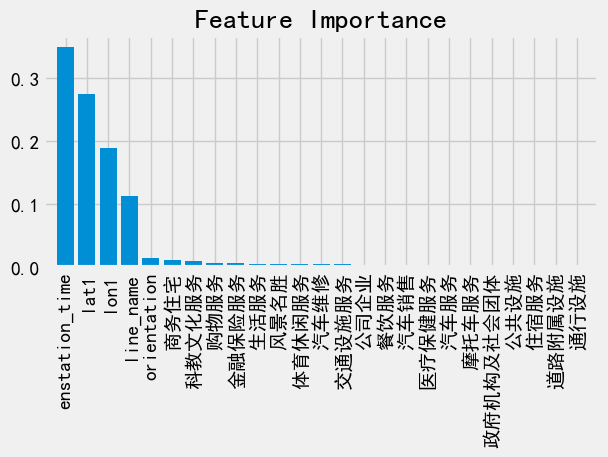

In [40]:
# fig1 = plt.figure(figsize=(20,8))
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']  #设置字体
plt.style.use('fivethirtyeight')  # 画布的风格
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importances[indices],
        align='center')
plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()